In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd

In [26]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [27]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [28]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# reflect an existing database into a new model
# reflect the tables
# We can view all of the classes that automap found
Base= automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()




['measurement', 'station']

In [30]:
# Save references to each table

Station=Base.classes.station
Measure=Base.classes.measurement



In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)



In [32]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [33]:
columns_s=inspector.get_columns('station')
for c in columns_s:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [34]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [35]:
columns_m = inspector.get_columns('measurement')
for col in columns_m:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [36]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

In [37]:
# app design testing (Not homework)



def start_only_data(start):
    

    
    temp=[
      func.min(Measure.tobs),
      func.max(Measure.tobs),
      func.avg(Measure.tobs)
      ]

    if type(start) is int:    
        if len(str(start))==8:
            
            st=str(start)
            syear=st[:4]
            smonth=st[4:6]
            sday=st[6:]

            start_temp_data=session.query(*temp).\
            filter(Measure.date >= dt.datetime(int(syear), int(smonth), int(sday))).\
            all()

            stmin=start_temp_data[0][0]
            stmax=start_temp_data[0][1]
            stavg=round(start_temp_data[0][2],2)

            return f"Min temperature: {stmin}, Max temperature: {stmax}, Average temperature: {stavg}."
    else:

        return "Please enter the start date as YYYYMMDD."



def start_end_data(start, end):
    

    
    temp=[
      func.min(Measure.tobs),
      func.max(Measure.tobs),
      func.avg(Measure.tobs)
      ]
    

    if len(str(start))==8 & len(str(end))==8:
        st=str(start)
        start_date=st[:4]+ "-"+st[4:6]+"-"+st[6:]

        et=str(end)
        end_date=et[:4]+ "-"+et[4:6]+"-"+et[6:]


        temp_data=session.query(*temp).\
        filter(Measure.date >= start_date).\
        filter(Measure.date <= end_date).\
        all()

        tmin=temp_data[0][0]
        tmax=temp_data[0][1]
        tavg=round(temp_data[0][2],2)

        return f"Min temperature: {tmin}, Max temperature: {tmax}, Average temperature: {tavg}."
    else:

        return "Please enter the start date as YYYYMMDD."

start_end_data(20120622, 20120630)






'Min temperature: 68.0, Max temperature: 81.0, Average temperature: 73.56.'

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


firstdate=session.query(Measure.date).order_by(Measure.date).first()
lastdate=session.query(Measure.date).order_by(Measure.date.desc()).first()
print(firstdate)
print(lastdate)
unano = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(unano)


climate=session.query(Measure.date, Measure.prcp).\
        filter(Measure.date >= unano).\
        order_by(Measure.date).all()


climate_count=session.query(Measure.date, Measure.prcp).\
        filter(Measure.date >= unano).\
        order_by(Measure.date).count()
print(climate_count)



df=pd.DataFrame(climate, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)


('2010-01-01',)
('2017-08-23',)
2016-08-23
2230


In [39]:
df[2000:-1]

,Precipitation
Date,
2017-07-10,NaN
2017-07-10,0.00
2017-07-10,0.02
2017-07-10,0.02
2017-07-11,0.00
...,...
2017-08-22,0.00
2017-08-22,0.50
2017-08-23,0.00


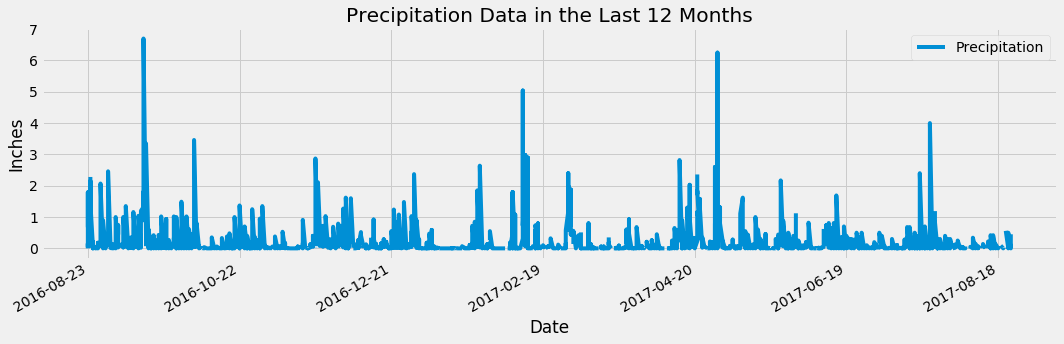

In [53]:
style.use('fivethirtyeight')
fig, ax=plt.subplots(figsize=(15,5))

ax.plot(df.index, df["Precipitation"])
fig.autofmt_xdate()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
ax.xaxis.set_major_locator(plt.MultipleLocator(60))
plt.title("Precipitation Data in the Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(df)
fig.tight_layout()
plt.show()


In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [42]:
# Design a query to show how many stations are available in this dataset?

count_mstation=session.query(func.count(Measure.station)).\
                group_by(Measure.station).count()
print(f'The Measurement table has {count_mstation} unique stations.')

count_sstation=session.query(func.count(Station.station)).\
                group_by(Station.station).count()
print(f'The Station table has {count_sstation} unique stations.')

count_msstation=session.query(Station.station, Measure.station).\
                filter(Station.station == Measure.station).\
                group_by(Station.station).\
                all()

count=0
for station in count_msstation:
    count += 1
    print(f'The station {count} is: {count_msstation[count-1][1]}.')



The Measurement table has 9 unique stations.
The Station table has 9 unique stations.
The station 1 is: USC00511918.
The station 2 is: USC00513117.
The station 3 is: USC00514830.
The station 4 is: USC00516128.
The station 5 is: USC00517948.
The station 6 is: USC00518838.
The station 7 is: USC00519281.
The station 8 is: USC00519397.
The station 9 is: USC00519523.


In [43]:
# double check
count1=session.query(Measure.station).distinct().count()
count2=session.query(Station.station).distinct().count()
print(count1)
print(count2)

9
9


In [44]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


active_station=session.query(Measure.id, Measure.station, func.count(Measure.station)).\
                group_by(Measure.station).\
                order_by(func.count(Measure.station).desc()).all()
active_station



[(12188, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2725, 'USC00513117', 2709),
 (9519, 'USC00519523', 2669),
 (16939, 'USC00516128', 2612),
 (5434, 'USC00514830', 2202),
 (14960, 'USC00511918', 1979),
 (7636, 'USC00517948', 1372),
 (9008, 'USC00518838', 511)]

In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

mostactives=session.query(Measure.id, Measure.station, func.count(Measure.station)).\
            group_by(Measure.station).\
            order_by(func.count(Measure.station).desc()).first()

most_active_station=mostactives.station
print(most_active_station)

temp=[Measure.station,
      func.min(Measure.tobs),
      func.max(Measure.tobs),
      func.avg(Measure.tobs)]

mostactive_temp=session.query(*temp).\
                filter(Measure.station==most_active_station).all()
mostactive_temp




USC00519281


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [46]:
# Choose the station with the highest number of temperature observations.

hightempstation2=session.query(Measure.station, func.count(Measure.tobs)).\
                group_by(Measure.tobs).\
                order_by(func.count(Measure.tobs).desc()).first()

print(hightempstation2)





('USC00519397', 1752)


In [47]:
# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram


lastdate_hightemp=session.query(Measure.date).\
         filter(Measure.station==hightempstation2.station).\
         order_by(Measure.date.desc()).first()
print(lastdate_hightemp)

oneyr_hightemp = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(oneyr_hightemp)


high_temp=session.query(Measure.tobs).\
                filter(Measure.station==hightempstation2.station).\
                filter(Measure.date >= oneyr_hightemp).\
                all()


high_temp[:20]


('2017-08-23',)
2016-08-23


[(81.0),
 (79.0),
 (80.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (80.0),
 (81.0),
 (80.0),
 (79.0),
 (75.0),
 (79.0),
 (76.0),
 (76.0),
 (80.0),
 (79.0),
 (78.0),
 (76.0)]

[81.0, 79.0, 80.0, 79.0, 77.0, 78.0, 78.0, 79.0, 80.0, 81.0]


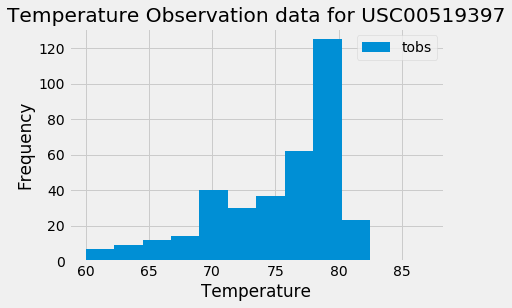

In [55]:
temp=[]
for t in high_temp:
    temp.append(t[0])

print(temp[:10])


dict = {"tobs": temp}

hist_df=pd.DataFrame(dict)
hist_df.head()

plt.hist(hist_df.tobs, bins=12)
plt.legend(hist_df)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Temperature Observation data for {hightempstation2.station}")
plt.show()


[77.0, 77.0, 80.0, 80.0, 75.0, 73.0, 78.0, 77.0, 78.0, 80.0]


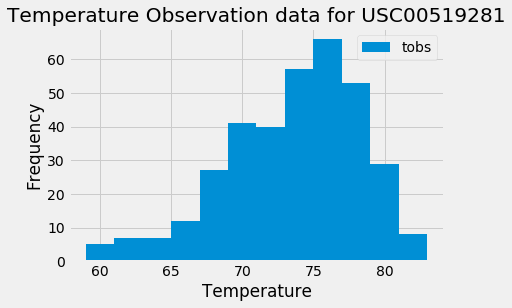

In [56]:
# For the most active station: histogram


high_temp2=session.query(Measure.tobs).\
                filter(Measure.station==most_active_station).\
                filter(Measure.date >= oneyr_hightemp).\
                all()


high_temp2[:20]


temp2=[]
for t in high_temp2:
    temp2.append(t[0])

print(temp2[:10])


dict2 = {"tobs": temp2}

hist_df2=pd.DataFrame(dict2)
hist_df2.head()

plt.hist(hist_df2.tobs, bins=12)
plt.legend(hist_df2)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"Temperature Observation data for {most_active_station}")
plt.show()





## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measure.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measure.date >= start_date).filter(Measure.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
